Задание 1. Реализуйте алгоритм K ближайших соседей для классификации.

* Создайте искуственный набор данных из 100 наблюдений с 3 классами.
* Реализуйте функцию, которая получает на вход тренировочный и тестовый наборы данных и $k$ - количество ближайших соседей, и возвращает метки тестового набора данных
* Используйте евклидову меру
* Если возникает неопределенность (например, все три соседа имею разные метки классов), то присвойте класс случайным образом
* Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой Accuracy (доля правильных ответов)
* Постройте разделающие поверхности классификатора Алгоритм к ближайших соседей:
Для каждого объекта тестового набора данных:
-- вычисление расстояний между всеми объектами тренировочного набора;
-- определение $k$ наименьших расстояний;
-- определение классов для $k$ найденных объектов;
-- присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

Визуализируем исходные данные, покажем разными цветами разбиение на 3 класса.

Text(0.5, 1.0, 'Initial data')

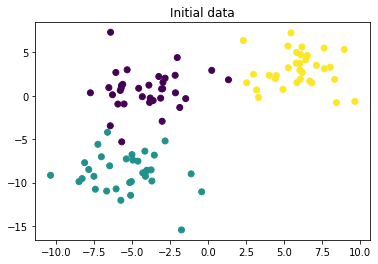

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3,
                  cluster_std = 2, random_state=17)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

Разобьём исходные данные на тренировочную и тестовую выборки в соотношении 80/20.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2, random_state=17)

Напишем функцию для вычисления Евклидовой меры как расстояния между точками.

In [ ]:
def dist(x_Test,x_Train):
  return np.sqrt(np.sum((x_Test - x_Train) ** 2))

Создадим функция, реализующую алгоритм k-ближайших соседей.

In [ ]:
from collections import Counter
def knN(x_train, y_train, x_test, k):
  Dist=[]
  for i in range(x_train.shape[0]):
    Dist.append([dist(x_test, x_train[i]), y_train[i]])#коллекционируем значения расстояния между тестовым значением и тренировочными и значения классов, к которым относятся
  
  D=sorted(Dist)#сортировка по возрастанию
  fd=[]
  C=[]
  for f in D[0:k]: #берём количество минимальных значений, соответствующее количеству соседей
    fd.append(f[1])
  c=Counter(fd) #подсчитываем количество в каждом классе
  
  for i in c:
    C.append(i)
  C.sort(reverse=True)#сортируем по убыванию, чтобы наверху остался член с максимально встречающимся классом среди ближайших соседей
  
  y_test=C[0]
  return y_test

Выведем предсказанные значения тестовой выборки для нескольких значений ближайших соседей $k$=[ 1, 3, 5, 7, 9] и значения метрики accuracy_score, показывающей долю правильных ответов. Заметим, что при увеличении количества соседей точность модели повышается.

In [ ]:
from sklearn.metrics import accuracy_score
k=[1,3,5,7,9]

for i in k:
  yy_test=[]
  for l in range(X_test.shape[0]):
    yy_test.append(knN(X_train, Y_train, X_test[l], i))
  Score=accuracy_score(Y_test,yy_test)
  print(yy_test,"Accuracy = ",Score)

[2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0] Accuracy =  0.9
[2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1] Accuracy =  0.95
[2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1] Accuracy =  0.95
[2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1] Accuracy =  0.95
[2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1] Accuracy =  0.95


Построим разделяющие поверхности классификатора и предсказанные точки.

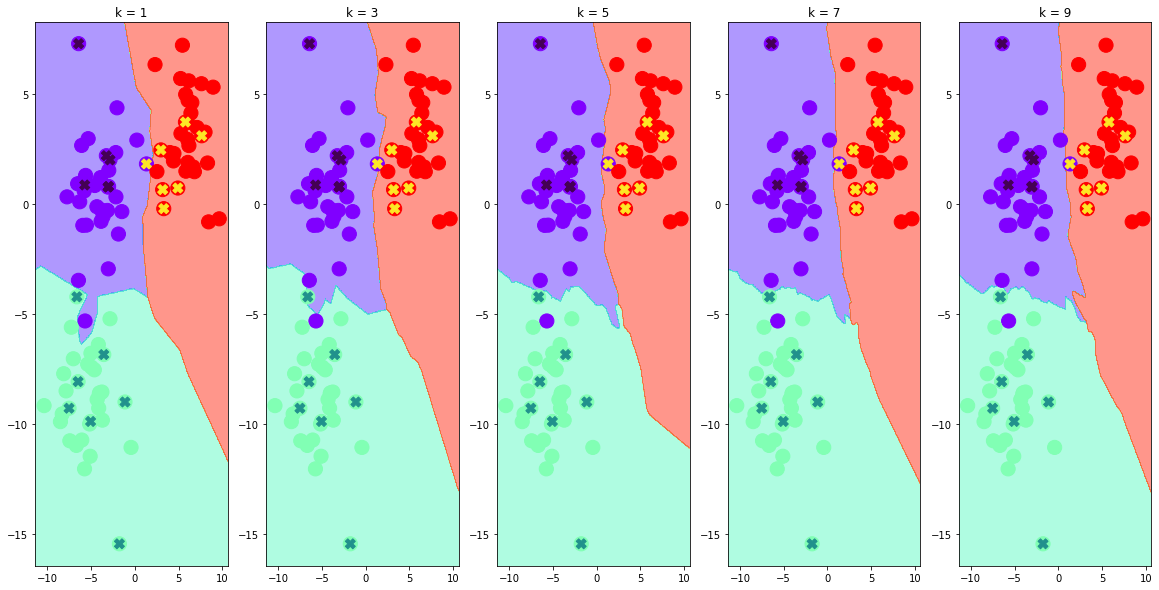

In [ ]:
h = .03
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

from sklearn.neighbors import KNeighborsClassifier
plt.figure(figsize=(20,10))
m=151
for nei in k:
  plt.subplot(m)
  m=m+1
  clf = KNeighborsClassifier(n_neighbors=nei)
  clf.fit(X,Y);
  Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
  Z = Z.reshape(xx.shape)
  cmap = plt.cm.rainbow

 
  plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
  plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=cmap)
  plt.scatter(X_test[:,0], X_test[:,1], s=100, c=yy_test, marker='X');
  plt.title(f'k = {nei}')

Задание 2. Реализуйте алгоритм K ближайших соседей для регрессии.

* создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренировочную выборку.
* предскажите функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.
* постройте на одном графике исходную функцию, тренировочные объекты и предсказанные для каждого значения $k$.$y = sin(x)$

Алгоритм регрессии:

Для каждого тестового объекта:

 - вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
 - нахождение $k$ объектов с минимальными расстояниями;
 - вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

Создадим функцию синуса для реальной, тренировочной и тестовой выборок.

In [ ]:
np.random.seed(42)
x_real = np.linspace(start=0, stop=5, num=100)
y_real = 25 * np.sin(x_real)  + 2 * x_real

x_train = np.linspace(start=0, stop=5, num=10)
y_train = 25 * np.sin(x_train) + 2 * x_train + 0.5 * np.random.normal(size=x_train.size)

x_test = np.linspace(start=0, stop=5, num=10)
y_test = 25 * np.sin(x_test) + 2 * x_test + 0.5 * np.random.normal(size=x_test.size)

Напишем функцию для вычисления Манхэттенского расстояния.

In [ ]:
def distreg(x_Test,x_Train):
  return np.sum(np.abs(x_Test - x_Train))

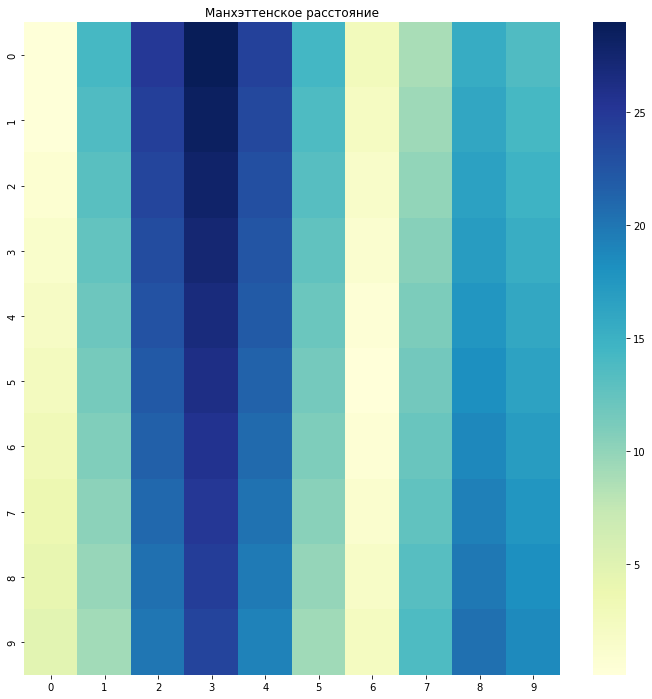

In [ ]:
dist = np.zeros((x_train.shape[0],x_train.shape[0]))
for i in range(x_train.shape[0]):
    for j in range(x_train.shape[0]):
        dist[i, j] = distreg(x_train[i],y_train[j])

plt.figure(figsize=(12,12))
sns.heatmap(dist, cmap="YlGnBu").set_title('Манхэттенское расстояние');

Непосредственно функция для предсказания значений алгоритмом k-наименьших соседей регрессии.

In [ ]:
import statistics 
def knNreg(x_train, y_train, x_test, k):
  Dist=[]
  for i in range(x_train.shape[0]):
    Dist.append([distreg(x_test, x_train[i]), y_train[i]])#высчтываем расстояние от точки до всех тренировочных
  D=sorted(Dist)
  C=[]
  for dd in D[0:k]:
    C.append(dd[1])#запомним минимальных k значений тестовой выборки, отсотированной по первому признаку
  s=sum(C)#подсчитаем сумму
  y_test=statistics.mean(C)#выведем среднее
  return y_test

Выведем все предвсказанные тестовые выборки для каждого значения количества соседей k.

In [ ]:
Kk=[1,3,5,7,9]
for kk in Kk:
  yreg_test=[]
  for l in range(x_test.shape[0]):
    yreg_test.append(knNreg(x_train, y_train, x_test[l], kk))
  print(yreg_test)

[0.24835707650561634, 14.227363604822157, 24.950871517021476, 28.980047205331466, 24.207869182659003, 14.334536862107608, 2.6920740025332277, -8.829953767464428, -15.453776227298043, -13.70182684478548]
[13.14219739944975, 13.14219739944975, 22.719427442391698, 26.04626263500398, 22.50748441669936, 13.74482668243328, 2.7322190323921363, -7.197218664076415, -12.661852279849317, -12.661852279849317]
[18.522901717267942, 18.522901717267942, 18.522901717267942, 21.34013767438834, 19.033079753930558, 12.276914697033376, 3.3901500105074738, -4.191789194981423, -4.191789194981423, -4.191789194981423]
[15.663017064425793, 15.663017064425793, 15.663017064425793, 15.663017064425793, 14.366115515287216, 10.125952682127187, 4.604138630440479, 4.604138630440479, 4.604138630440479, 4.604138630440479]
[9.484154384024231, 9.484154384024231, 9.484154384024231, 9.484154384024231, 9.484154384024231, 7.934133948325221, 7.934133948325221, 7.934133948325221, 7.934133948325221, 7.934133948325221]


Построим график исходной функции, значения тренировочной и предсказанной выборок для разного количества соседей k.

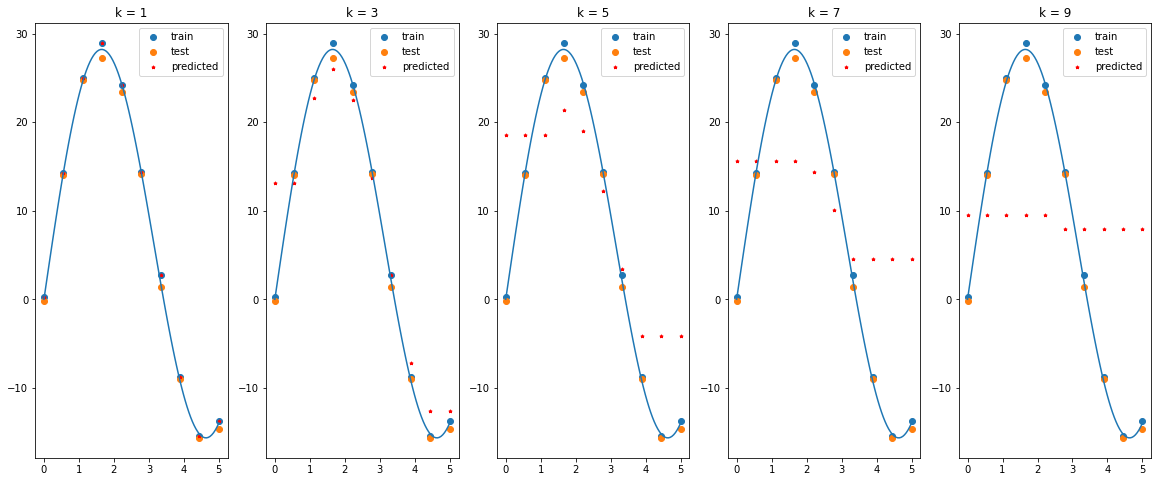

In [ ]:
plt.figure(figsize=(20, 8))
m=151
Kk=[1,3,5,7,9]
for K in Kk:
  plt.subplot(m)
  m=m+1
  plt.plot(x_real, y_real)
  plt.scatter(x_train, y_train, label='train')
  plt.scatter(x_test, y_test, label='test')
  yreg_test=[]
  for l in range(x_test.shape[0]):
    yreg_test.append(knNreg(x_train, y_train, x_test[l], K))
  plt.scatter(x_test, yreg_test, s = 10, marker='*', c='r',label='predicted')
  plt.title(f'k = {K}')
  plt.legend();